# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:black">  Lecture 9</span>
### Made by Alessandro Bertarelli

The objective of this exercise is to solve the classic Traveling Salesman Problem (TSP) using a genetic algorithm to find the optimal solution after a certain amount of generations

The structure of the code is as follows: 

- There are 3 classes: City, Path (the individuals in our GA) and Population
- The group of 34 cities is generated at the beginning with unique coordinates and ID (as if it were the name of the city)
- An initial (Gen 0) of paths is generated by randomly ordering the 34 cities in 1000 paths.
- The individuals are ordered based on fitness (shortes path = more fit)
- A new generation is made by pairing the parents 500 times to produce 2 offspring each time. The parent selection is based on fitness
- Mutations are applied to the new pop
- The old population gets substituted by the new pop
- The pop is ordered by fitness again
- If the difference in length between the longest and shortest path in the gen. is very small, convergence is reached to a minimum, algo stop.
- Otherwise, make a new gen and repeat


There are 4 parameters that influence the subsequent generations:

- Selection curve steepness: (i.e. how much more likely are the fitter parents to be chosen for reproduction over the rest)
- Pair permutation chance (Mutation: chance to swap a city in pos. x with one in pos. y)
- Contiguous permutation chance (Mutation: chance to swap n contiguous cities starting at a with n starting at b) 
- Group inversion chance (Mutation: chance to invert the order that n cities are found in)

A non-trivial challenge within the problem is to find a good balance between optimal selection (higher curve steepness) and genetic variety that prevents early convergence to local minima (more mutation chances)

Here's an example of the best result (obviously not the true best path but close) obtained before convergence with certain parameter values, compared with the correct best path:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

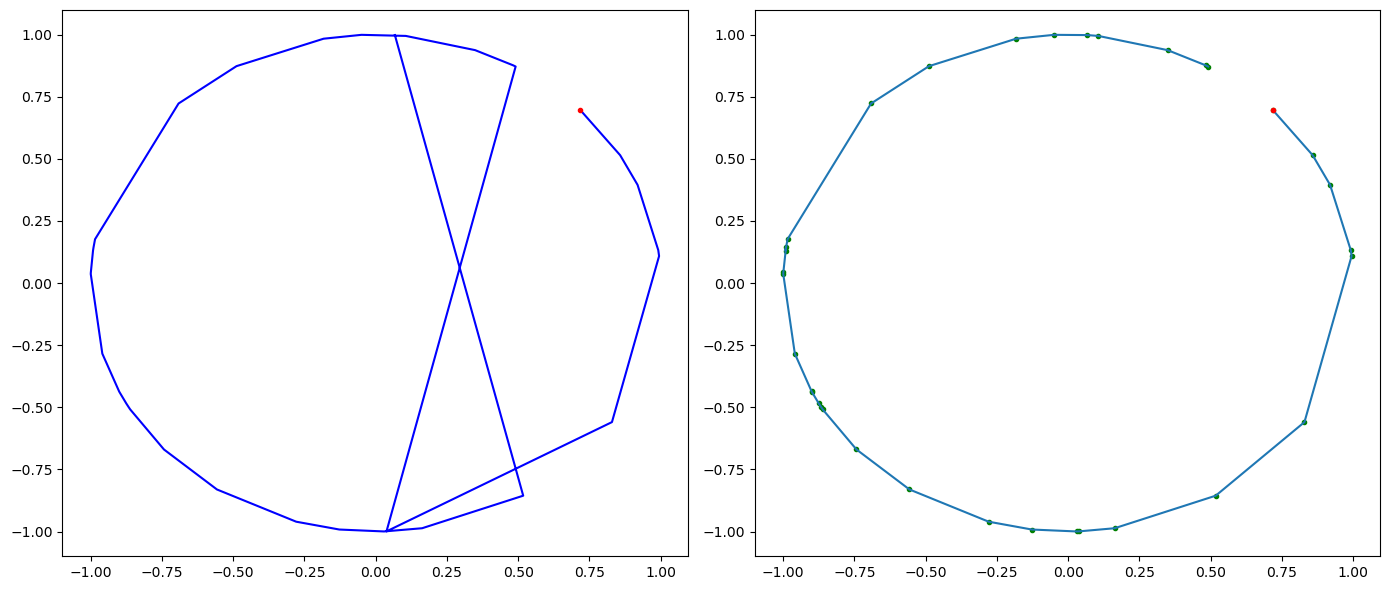

In [2]:


plt.figure(figsize = (14,6))

mydata = open("Best_path_not.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_not.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))
    
plt.subplot(1,2,1)
plt.plot(x, y, 'b')
plt.plot(x[0], y[0], '.r')


mydata = open("Best_path_1.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_1.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(1,2,2)
plt.plot(x,y, '.g')
plt.plot(x,y)
plt.plot(x[0], y[0], '.r')
plt.tight_layout()
plt.show()

**Note that the segment connecting the last city back to the first is not shown to clarify which direction the path went but that last distance IS included in the fitness calculation**

We now want to show the progression of the average lengths of the top 50% of the population throughout generations, and show the difference between various parameters.

Every simulation is stopped when convergence to the circumference is reached, which may happen at different Gen. numbers depending on the parameters. 

Also, the final values plotted can be slightly differently because the convergence check is only on the best element whereas the plotted values are the top 50% average

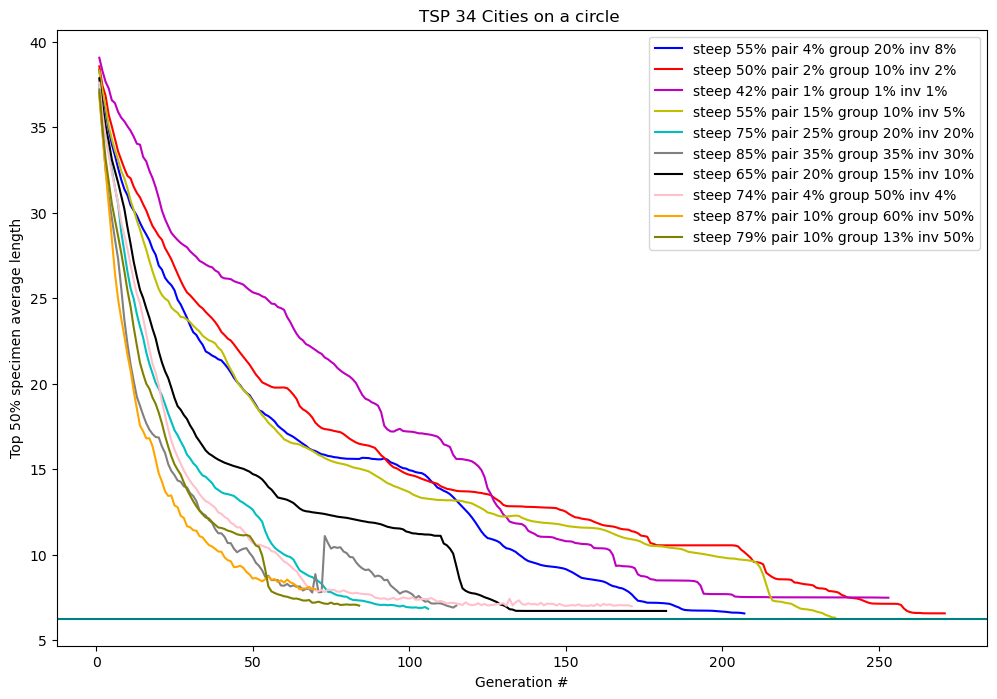

In [3]:
plt.figure(figsize = (12,8))


### This has pair = 4%, group 20%, invert 8% 
mydata = open("Best_Averages1.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages1.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'b', label = 'steep 55% pair 4% group 20% inv 8%')

### This has pair = 2%, group 10%, invert 2% 
mydata = open("Best_Averages2.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages2.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'r', label = 'steep 50% pair 2% group 10% inv 2%')

### This has pair = 1%, group 1%, invert 1% 
mydata = open("Best_Averages3.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages3.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'm', label = 'steep 42% pair 1% group 1% inv 1%')

### This has pair = 15%, group 10%, invert 5% 
mydata = open("Best_Averages4.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages4.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'y', label = 'steep 55% pair 15% group 10% inv 5%')


### This has pair = 25%, group 20%, invert 20% 
mydata = open("Best_Averages5.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages5.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'c', label = 'steep 75% pair 25% group 20% inv 20%')

### This has pair = 35%, group 30%, invert 30% 
mydata = open("Best_Averages6.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages6.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'grey', label = 'steep 85% pair 35% group 35% inv 30%')

### This has pair = 20%, group 15%, invert 10% 
mydata = open("Best_Averages7.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages7.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'black', label = 'steep 65% pair 20% group 15% inv 10%')

### This has pair = 4%, group 50%, invert 4% 
mydata = open("Best_Averages8.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages8.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'pink', label = 'steep 74% pair 4% group 50% inv 4%')

### This has pair = 10%, group 60%, invert 50% 
mydata = open("Best_Averages9.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averages9.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'orange', label = 'steep 87% pair 10% group 60% inv 50%')

### This has pair = 10%, group 13%, invert 50% 
mydata = open("Best_Averagesfin.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_Averagesfin.dat', delimiter='\t')
datalist = df.values.tolist()

Gen = []
Len = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    Gen.append(float(mylist[0]))
    Len.append(float(mylist[1]))


plt.plot(Gen, Len, 'olive', label = 'steep 79% pair 10% group 13% inv 50%')

plt.title("TSP 34 Cities on a circle ")
plt.xlabel("Generation #")
plt.ylabel("Top 50% specimen average length")
plt.axhline(y = 6.243, color = 'teal', linestyle = '-')
plt.legend(loc = "upper right")
plt.show()


We can observe that steepness of the parents' selection curve has the most impact on rapidity of convergence, however mutations are needed to prevent a stalemate in which the reproducible part of the population becomes all the same. Furthermore it seems that the pair-permutation chance has the weakest effect compared to the group permutation and inversion chances, which makes sense since it's the least disruptive of the mutations

Since it is very hard to guess the real shortest path when the cities are in a random configuration, such as inside a square, for this second case we'll let the algorithm run for  longer than the number of generations needed to reach convergence in the circle, (anywhere from 10% to 100% longer depending on the final results) given certain parameters, and see what we obtain.

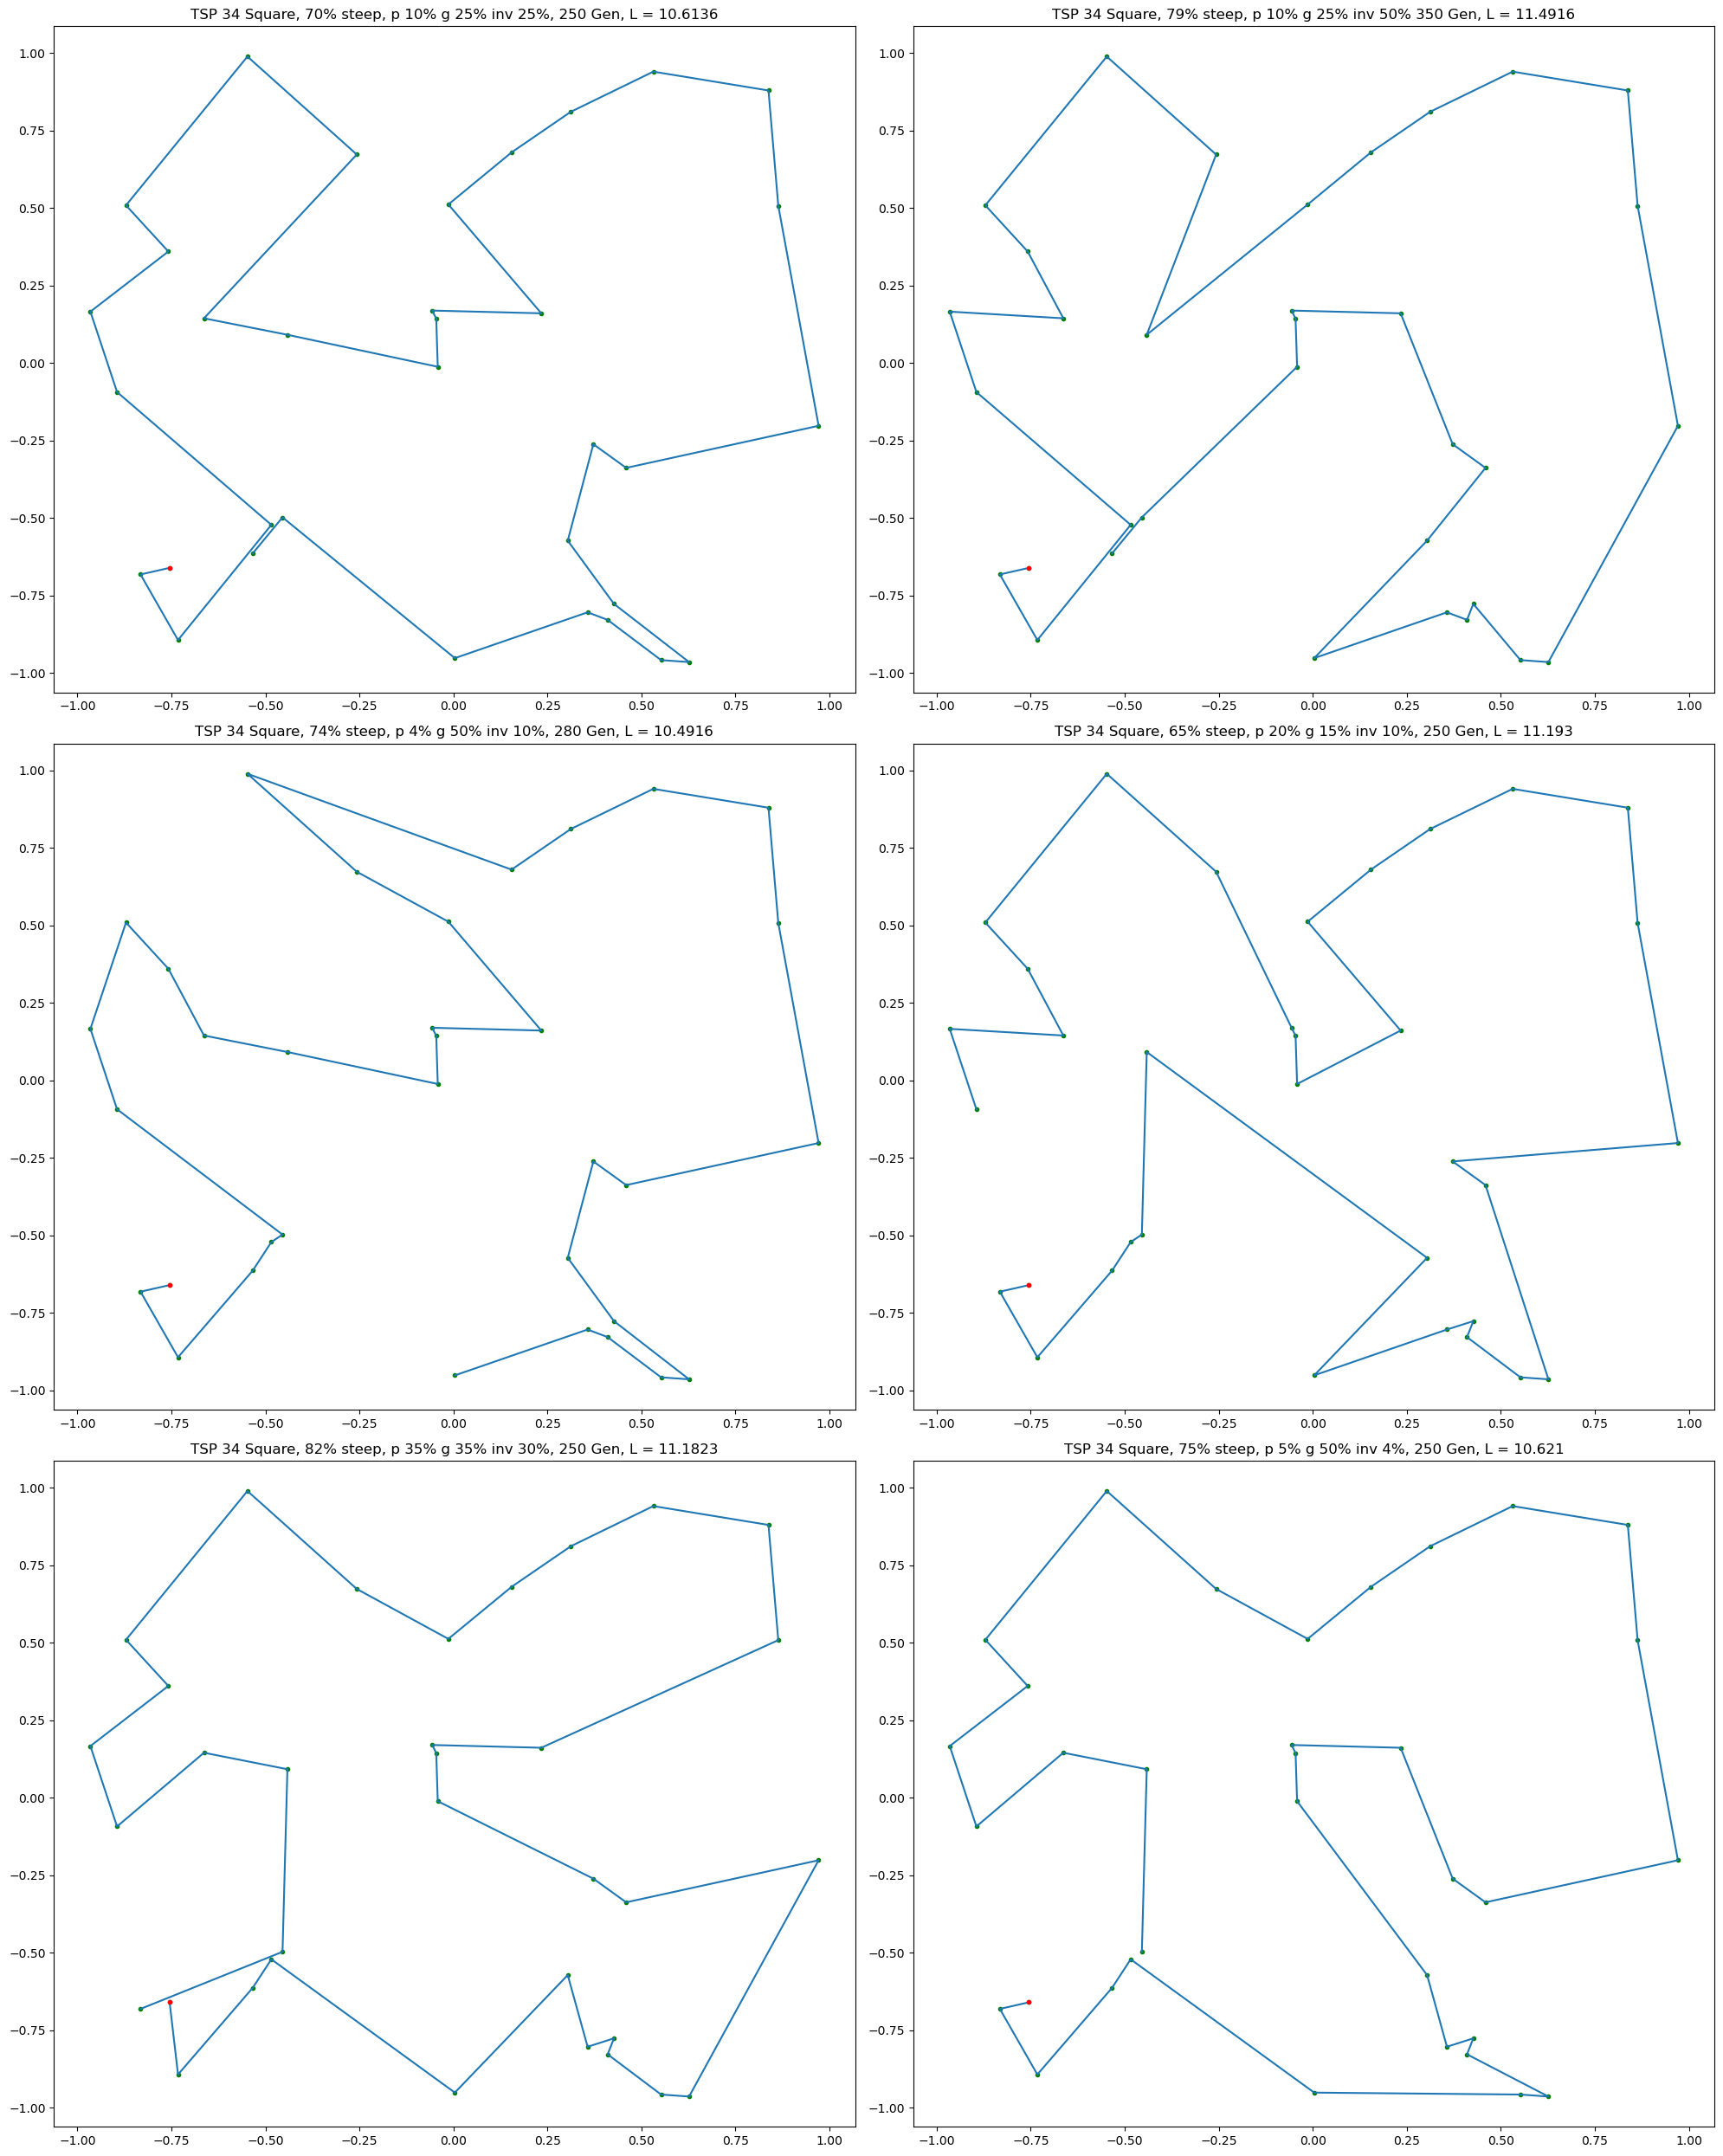

In [28]:
plt.figure(figsize = (20,25))

mydata = open("Best_path_square.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,1)
plt.title("TSP 34 Square, 70% steep, p 10% g 25% inv 25%, 250 Gen, L = 10.6136")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')
##############################################################
mydata = open("Best_path_square2.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square2.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,2)
plt.title("TSP 34 Square, 79% steep, p 10% g 25% inv 50% 350 Gen, L = 11.4916")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')

###############################################################
mydata = open("Best_path_square3.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square3.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,3)
plt.title("TSP 34 Square, 74% steep, p 4% g 50% inv 10%, 280 Gen, L = 10.4916")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')

###############################################################
mydata = open("Best_path_square4.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square4.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,4)
plt.title("TSP 34 Square, 65% steep, p 20% g 15% inv 10%, 250 Gen, L = 11.193")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')
###############################################################
mydata = open("Best_path_square5.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square5.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,5)
plt.title("TSP 34 Square, 82% steep, p 35% g 35% inv 30%, 250 Gen, L = 11.1823")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')
###############################################################
mydata = open("Best_path_square6.dat", "r")
length = len(mydata.readlines())
mydata.close()

df = pd.read_csv('Best_path_square6.dat', delimiter='\t')
datalist = df.values.tolist()

x = []
y = []

for i in range (length-1):
    myrow = datalist[i]
    myrow = [x.strip(' ') for x in myrow]
    mylist = myrow[0].split()
    x.append(float(mylist[2]))
    y.append(float(mylist[3]))

plt.subplot(3,2,6)
plt.title("TSP 34 Square, 75% steep, p 5% g 50% inv 4%, 250 Gen, L = 10.621")
plt.plot(x,y, '.g')
plt.plot(x, y)
plt.plot(x[0], y[0], '.r')
###############################################################
plt.tight_layout()
plt.show()